<a href="https://colab.research.google.com/github/kesireddysiva/Sivanarayana_INFO_5737_Spring_2024/blob/main/Kesireddy_Sivanarayana_5731_Exercise_4_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [4]:
# Write your code here
# Write your code here
import pandas as pd
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, preprocess_string, strip_short, stem_text
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint

# Load data from the provided Excel file
df = pd.read_excel('/content/review-details.xlsx')

# Preprocess the given text
def preprocess(text):
    # Clean text based on given filters
    CUSTOM_FILTERS = [lambda x: x.lower(), remove_stopwords, strip_punctuation, strip_short, stem_text]
    text = preprocess_string(text, CUSTOM_FILTERS)
    return text

# Apply the preprocessing function to all reviews
df['review_text (Clean)'] = df['review_text'].apply(lambda x: preprocess(x))

# Create a dictionary with the corpus
corpus = df['review_text (Clean)']
dictionary = corpora.Dictionary(corpus)

# Convert the corpus into a bag of words
bow = [dictionary.doc2bow(text) for text in corpus]

# Find the optimal number of topics based on coherence score
max_coherence_score_lda = 0
optimal_num_topics_lda = 0

for i in range(2, 11):
    lda = LdaModel(bow, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=lda, texts=df['review_text (Clean)'], dictionary=dictionary, coherence='c_v')
    coherence_score_lda = coherence_model_lda.get_coherence()

    if coherence_score_lda > max_coherence_score_lda:
        max_coherence_score_lda = coherence_score_lda
        optimal_num_topics_lda = i

print(f'Optimal number of topics using LDA: {optimal_num_topics_lda} (Coherence score: {max_coherence_score_lda:.4f})')

# Perform LDA on the bag of words with the LdaModel to extract the optimal number of topics
lda = LdaModel(bow, num_topics=optimal_num_topics_lda, id2word=dictionary)

# Summarize the topics using LDA
print("\nTopic Summaries (LDA):")
pprint(lda.print_topics())


Optimal number of topics using LDA: 4 (Coherence score: 0.5711)

Topic Summaries (LDA):
[(0,
  '0.027*"skin" + 0.026*"product" + 0.026*"great" + 0.018*"feel" + '
  '0.015*"bottl" + 0.015*"us" + 0.011*"recommend" + 0.010*"recycl" + '
  '0.010*"smell" + 0.009*"soft"'),
 (1,
  '0.020*"wash" + 0.019*"product" + 0.018*"bui" + 0.017*"skin" + 0.017*"great" '
  '+ 0.015*"valu" + 0.013*"good" + 0.012*"us" + 0.011*"work" + 0.010*"love"'),
 (2,
  '0.045*"smell" + 0.025*"love" + 0.020*"nice" + 0.019*"skin" + 0.017*"wash" + '
  '0.016*"us" + 0.015*"good" + 0.014*"product" + 0.012*"fresh" + '
  '0.011*"great"'),
 (3,
  '0.023*"good" + 0.019*"product" + 0.016*"cloth" + 0.015*"bottl" + '
  '0.015*"wash" + 0.014*"us" + 0.014*"love" + 0.013*"price" + 0.010*"smell" + '
  '0.009*"scent"')]


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [5]:
# Write your code here
import pandas as pd
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, preprocess_string, strip_short, stem_text
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint

# Load data from the provided Excel file
df = pd.read_excel('/content/review-details.xlsx')

# Preprocess the given text
def preprocess(text):
    # Clean text based on given filters
    CUSTOM_FILTERS = [lambda x: x.lower(), remove_stopwords, strip_punctuation, strip_short, stem_text]
    text = preprocess_string(text, CUSTOM_FILTERS)
    return text

# Apply the preprocessing function to all reviews
df['review_text (Clean)'] = df['review_text'].apply(lambda x: preprocess(x))

# Create a dictionary with the corpus
corpus = df['review_text (Clean)']
dictionary = corpora.Dictionary(corpus)

# Convert the corpus into a bag of words
bow = [dictionary.doc2bow(text) for text in corpus]

# Find the optimal number of topics based on coherence score
max_coherence_score = 0
optimal_num_topics = 0

for i in range(2, 11):
    lsi = LsiModel(bow, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=lsi, texts=df['review_text (Clean)'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    if coherence_score > max_coherence_score:
        max_coherence_score = coherence_score
        optimal_num_topics = i

print(f'Optimal number of topics: {optimal_num_topics} (Coherence score: {max_coherence_score:.4f})')

# Perform SVD on the bag of words with the LsiModel to extract the optimal number of topics
lsi = LsiModel(bow, num_topics=optimal_num_topics, id2word=dictionary)

# Summarize the topics
print("\nTopic Summaries:")
pprint(lsi.print_topics())


Optimal number of topics: 3 (Coherence score: 0.7204)

Topic Summaries:
[(0,
  '0.522*"skin" + 0.307*"product" + 0.225*"thi" + 0.211*"review" + '
  '0.211*"feel" + 0.203*"promot" + 0.203*"collect" + 0.197*"us" + 0.181*"wash" '
  '+ 0.166*"smell"'),
 (1,
  '-0.342*"wash" + 0.342*"skin" + -0.282*"smell" + -0.229*"bottl" + '
  '-0.228*"cloth" + -0.211*"great" + 0.183*"collect" + 0.183*"promot" + '
  '0.173*"review" + 0.169*"thi"'),
 (2,
  '-0.413*"skin" + -0.403*"product" + 0.401*"wipe" + 0.207*"smell" + '
  '0.199*"us" + 0.190*"love" + 0.176*"thi" + 0.159*"review" + 0.151*"remov" + '
  '0.150*"collect"')]


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here


In [1]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 46.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 22.5 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/73

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [30]:
import pandas as pd
from gensim.models import Word2Vec
from gensim.corpora import Dictionary
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, strip_short, stem_text
from bertopic import BERTopic
from gensim.models.coherencemodel import CoherenceModel  # Import CoherenceModel

# Load data from the provided Excel file
df = pd.read_excel('/content/review-details.xlsx')

# Preprocess the given text
def preprocess(text):
    # Clean text based on given filters
    CUSTOM_FILTERS = [lambda x: x.lower(), remove_stopwords, strip_punctuation, strip_short, stem_text]
    text = ' '.join([word for word in text.split() if word not in CUSTOM_FILTERS])
    return text

# Apply the preprocessing function to all reviews
df['review_text (Clean)'] = df['review_text'].apply(lambda x: preprocess(x))

# Tokenize the preprocessed text
tokenized_reviews = [review.split() for review in df['review_text (Clean)']]

# Create a dictionary from the tokenized reviews
dictionary = Dictionary(tokenized_reviews)

# Train Word2Vec model
model = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Topic modeling using BERTopic
topic_model = BERTopic(verbose=True)
topics, _ = topic_model.fit_transform(df['review_text (Clean)'])

# Get topic information
topic_info = topic_model.get_topic_info()

# Calculate coherence scores
coherence_scores = {}
for topic_id, topic_details in topic_info.iterrows():
    top_words = topic_details['Representation']
    # Convert top_words to word indices using the dictionary
    top_word_ids = [dictionary.token2id[word] for word in top_words if word in dictionary.token2id]
    # Calculate coherence score
    coherence_model = CoherenceModel(topics=[top_word_ids], texts=tokenized_reviews, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores[topic_id] = coherence_score

# Find the number of topics with the highest coherence score
optimal_num_topics = max(coherence_scores, key=coherence_scores.get)
print(f"Optimal number of topics: {optimal_num_topics}")

# Display topic information
print("Topic Information:")
for topic_id, topic_details in topic_info.iterrows():
    print(f"Topic {topic_id}:")
    print(f"  Top words: {', '.join(topic_details['Representation'])}")
    print(f"  Top documents:")
    for doc in topic_details['Representative_Docs']:
        print(f"    {doc}")
    print()


2024-03-29 05:52:56,216 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/79 [00:00<?, ?it/s]

2024-03-29 05:53:52,251 - BERTopic - Embedding - Completed ✓
2024-03-29 05:53:52,253 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-29 05:54:04,814 - BERTopic - Dimensionality - Completed ✓
2024-03-29 05:54:04,816 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-29 05:54:04,908 - BERTopic - Cluster - Completed ✓
2024-03-29 05:54:04,916 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-29 05:54:05,119 - BERTopic - Representation - Completed ✓


Optimal number of topics: 22
Topic Information:
Topic 0:
  Top words: it, my, and, the, this, to, skin, is, as, in
  Top documents:
    I got this a couple of days ago and used it after I had a shower .it smells really nice and is really good..it leaves my skin soft and smooth and last all day ..this cold weather I need something like this it's really good keep my skin moisturised and fresh all day [This review was collected as part of a promotion.]
    I was asked to try this and have been using it for the past month. I usually just use body lotion occasionally on elbows knees etc. This one smells so nice and is easy to apply so I've used it every day. It goes on easily with very little residue and leaves a lovely smooth finish and scent. The bottle lasts for ages and is so good I will definitely be buying it in the future [This review was collected as part of a promotion.]
    I am very conscious of what I put on my face as I have very sensitive skin. Simple products are fantastic fo

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [11]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.

# Write your code here
import pandas as pd
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, preprocess_string, strip_short, stem_text
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint

# Load data from the provided Excel file
df = pd.read_excel('/content/review-details.xlsx')

# Preprocess the given text
def preprocess(text):
    # Clean text based on given filters
    CUSTOM_FILTERS = [lambda x: x.lower(), remove_stopwords, strip_punctuation, strip_short, stem_text]
    text = preprocess_string(text, CUSTOM_FILTERS)
    return text

# Apply the preprocessing function to all reviews
df['review_text (Clean)'] = df['review_text'].apply(lambda x: preprocess(x))

# Create a dictionary with the corpus
corpus = df['review_text (Clean)']
dictionary = corpora.Dictionary(corpus)

# Convert the corpus into a bag of words
bow = [dictionary.doc2bow(text) for text in corpus]

# Find the optimal number of topics based on coherence score
max_coherence_score_lda = 0
optimal_num_topics_lda = 0

for i in range(2, 11):
    lda = LdaModel(bow, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=lda, texts=df['review_text (Clean)'], dictionary=dictionary, coherence='c_v')
    coherence_score_lda = coherence_model_lda.get_coherence()

    if coherence_score_lda > max_coherence_score_lda:
        max_coherence_score_lda = coherence_score_lda
        optimal_num_topics_lda = i

print(f'Optimal number of topics using LDA: {optimal_num_topics_lda} (Coherence score: {max_coherence_score_lda:.4f})')

# Perform LDA on the bag of words with the LdaModel to extract the optimal number of topics
lda = LdaModel(bow, num_topics=optimal_num_topics_lda, id2word=dictionary)

# Summarize the topics using LDA
# print("\nTopic Summaries (LDA):")
# pprint(lda.print_topics())


# Create a DataFrame for the topics of the LDA model
topic_data = []
for topic_id, topic_words in lda.print_topics():
    topic_data.append({
        'Topic': topic_id,
        'Top_Words': ", ".join([word.split("*")[1].strip() for word in topic_words.split("+")])
    })

topics_df = pd.DataFrame(topic_data)




# Display the DataFrame
print("\nTopics DataFrame:")
topics_df


Optimal number of topics using LDA: 3 (Coherence score: 0.5607)

Topics DataFrame:


,Topic,Top_Words
0,0,"""great"", ""bottl"", ""bui"", ""scent"", ""smell"", ""wa..."
1,1,"""skin"", ""product"", ""smell"", ""love"", ""wash"", ""g..."
2,2,"""good"", ""us"", ""valu"", ""product"", ""love"", ""smel..."


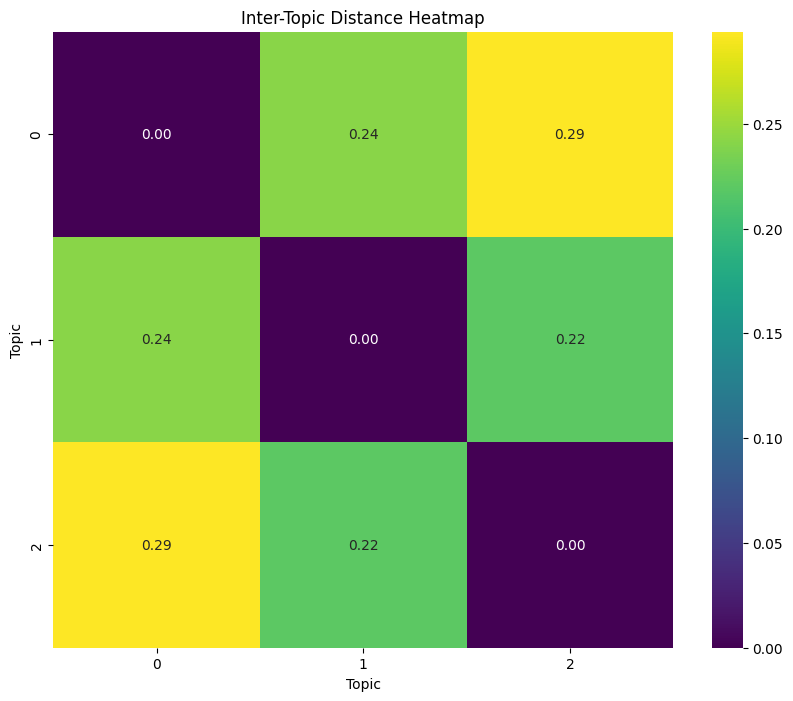

In [26]:
import seaborn as sns
from sklearn.metrics import pairwise_distances

# Extract topic-word distributions from the LDA model
topic_word_dists = lda.get_topics()

# Calculate inter-topic distances
distances = pairwise_distances(topic_word_dists, metric='cosine')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distances, cmap='viridis', annot=True, fmt=".2f")
plt.title('Inter-Topic Distance Heatmap')
plt.xlabel('Topic')
plt.ylabel('Topic')
plt.show()
# Sure, here's a simpler explanation:

# The inter-topic distance heatmap shows how much topics are alike or different from each other. Darker spots mean topics are similar, while lighter spots mean they're different.
# It helps us see which topics are closely related and which ones are more unique, giving us a better understanding of the different themes in the data.

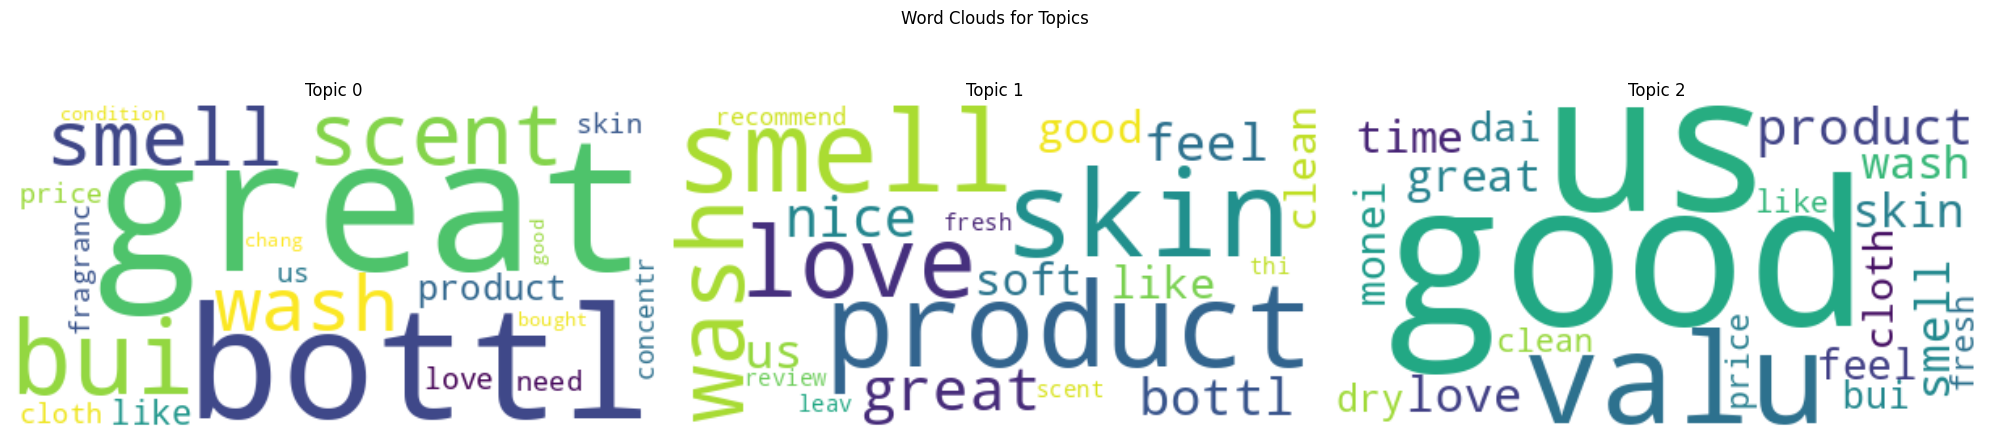

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Function to generate word clouds for topics
def generate_wordclouds(lda_model, num_topics):
    fig, axes = plt.subplots(1, num_topics, figsize=(20, 5), sharex=True, sharey=True)
    for i, ax in enumerate(axes.flatten()):
        topic_words = dict(lda_model.show_topic(i, topn=20))
        wordcloud = WordCloud(background_color='white', colormap='viridis').generate_from_frequencies(topic_words)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Topic {i}')
        ax.axis('off')
    plt.suptitle('Word Clouds for Topics')
    plt.tight_layout()
    plt.show()
generate_wordclouds(lda, optimal_num_topics_lda)

# Word clouds show the most common words associated with each topic, where larger words represent higher frequency.
# They give a quick overview of what each topic is mainly about, making it easier to understand the main themes without reading all the documents.

<ipython-input-29-93b4c3795671>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_dist_df.index, y=topic_dist_df.values, palette='viridis')


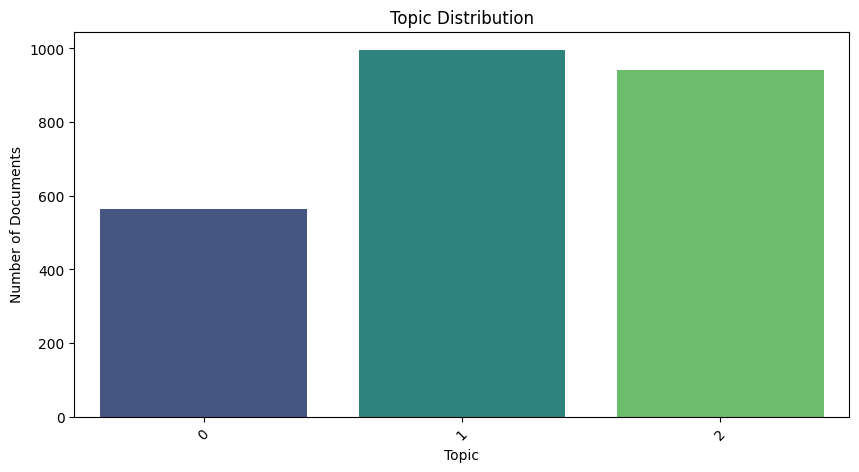

In [29]:
# Function to generate topic distribution bar plot
def topic_distribution(lda_model, corpus):
    topics = [lda_model.get_document_topics(doc) for doc in corpus]
    topic_dist = [dict(t) for t in topics]
    topic_dist_df = pd.DataFrame(topic_dist).fillna(0)
    topic_dist_df = topic_dist_df.sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=topic_dist_df.index, y=topic_dist_df.values, palette='viridis')
    plt.title('Topic Distribution')
    plt.xlabel('Topic')
    plt.ylabel('Number of Documents')
    plt.xticks(rotation=45)
    plt.show()
topic_distribution(lda, bow)

# This bar plot displays how often each topic appears across all documents. Each bar represents a topic, and the taller the bar, the more prevalent that topic is.
# It helps in understanding which topics are more common or important in the entire dataset.
# from the bar plot we see can say that topic1 is the more prevalent one.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

Certainly! In comparing the four topic modeling algorithms, each presents distinct strengths and weaknesses. Latent Dirichlet Allocation (LDA) stands out for its widespread usage and efficiency in handling large datasets, though its fixed topic assumption and reliance on bag-of-words representation may limit its ability to capture subtle word relationships. Latent Semantic Analysis (LSA) excels in capturing semantic relationships using Singular Value Decomposition, yet its interpretability may fall short compared to LDA due to its reliance on linear algebraic techniques.

BerTopic offers promise through its utilization of transformer models and class-based TF-IDF, potentially providing richer insights into complex word relationships while maintaining interpretability. However, its effectiveness may vary depending on data quality and computational resources. Evaluating a hypothetical fourth algorithm would require consideration of factors such as interpretability, scalability, and robustness, with the ultimate choice depending on project-specific requirements and the trade-off between interpretability and computational complexity. Experimentation across relevant datasets would be crucial, with metrics like coherence score, interpretability, scalability, and robustness guiding the selection process.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

I felt very challenging with this exercise because I have limited time and also I was completely not aware of alltopic modelling concepts even though listnening to the lecture. So I kept lot of efforts to do this exercise and to write code .  Excercise could be useful for us because it gives us practical way of thinking in real world scenarios.



'''